In [28]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import accuracy_score

In [12]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
gender_data = pd.read_csv('gender_submission.csv')

In [13]:
train_data.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test_data.isnull().sum(axis = 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lefebre, Miss. Mathilde",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
gender_data.describe(include='all')

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [17]:
# print data info, note significant gaps in the cabin then age NaN entries.
print('\nTrain Data\n')
train_data.info()

# print data info, note significant gaps in the cabin then age NaN entries.
print('\nTest Data\n')
test_data.info()


Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare    

In [18]:
train_data = train_data.fillna(np.nan)
train_data.drop('Cabin', axis=1, inplace=True)
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data['Embarked'].fillna( method ='ffill', inplace = True)
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_data['Pclass'] = train_data['Pclass'].astype('category')

In [19]:
test_data = test_data.fillna(np.nan)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
test_data['Embarked'].fillna(method ='ffill', inplace = True)
test_data['Fare'].fillna(method ='ffill', inplace = True)
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Pclass'] = test_data['Pclass'].astype('category')

In [20]:
# print data info, note significant gaps in the cabin then age NaN entries.
print('\nTrain Data\n')
train_data.info()

# print data info, note significant gaps in the cabin then age NaN entries.
print('\nTest Data\n')
test_data.info()


Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 70.7+ KB

Test Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null category
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-nul

In [21]:
y_train = pd.DataFrame(train_data['Survived'], columns=['Survived'])
X_train = train_data
X_train.drop('Survived', axis=1, inplace=True)
X_train.drop('Name', axis=1, inplace=True)

In [22]:
X_train = pd.get_dummies(X_train)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 693)
(179, 693)
(712, 1)
(179, 1)


In [25]:
#Setup Models 
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
acc_scores = pd.DataFrame(columns=['Model','Accuracy'])

<IPython.core.display.Javascript object>


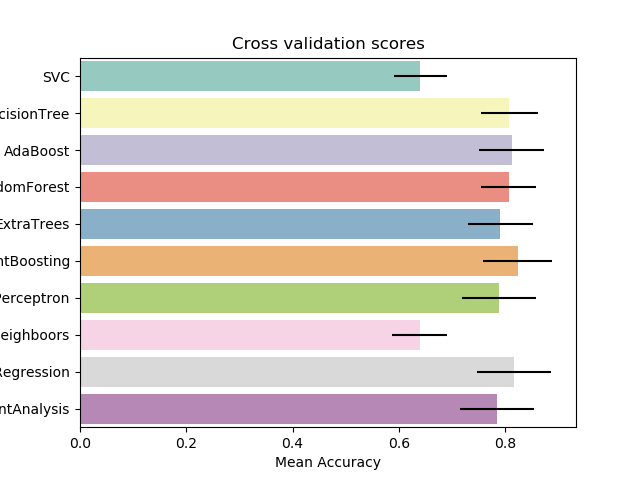

In [29]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = 'accuracy', cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors': cv_std,'Algorithm':['SVC','DecisionTree','AdaBoost',
'RandomForest','ExtraTrees','GradientBoosting','MultipleLayerPerceptron','KNeighboors','LogisticRegression','LinearDiscriminantAnalysis']})

g = sns.barplot('CrossValMeans','Algorithm',data = cv_res, palette='Set3',orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

In [34]:
cv_res.sort_values(by='CrossValMeans', ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
5,0.823051,0.065470,GradientBoosting
8,0.816147,0.069671,LogisticRegression
2,0.811822,0.060914,AdaBoost
1,0.807636,0.053854,DecisionTree
3,0.806167,0.052322,RandomForest
4,0.790891,0.060619,ExtraTrees
6,0.788132,0.069256,MultipleLayerPerceptron
9,0.783908,0.069558,LinearDiscriminantAnalysis
0,0.640330,0.050161,SVC
7,0.638881,0.051399,KNeighboors


In [35]:
# Run Random Forest Model
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
acc_scores = acc_scores.append({'Model': 'Random Forest Base', 'Accuracy':acc_rf}, ignore_index=True)

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [36]:
# Run DTC Model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
acc_scores = acc_scores.append({'Model': 'Decision Tree Base', 'Accuracy':acc_dt}, ignore_index=True)

In [37]:
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
acc_scores.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Random Forest Base,0.832402
1,Decision Tree Base,0.810056


In [39]:
# Random Forest Tuning
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.5s
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished
/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [41]:
rf_random.best_score_

0.8188202247191011

In [137]:
rf_random.best_estimator_.fit(X_train, y_train)
pred_rf = rf_random.best_estimator_.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
acc_scores = acc_scores.append({'Model': 'Random Forest(Tune)', 'Accuracy':acc_rf}, ignore_index=True)

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [44]:
# Decision Tree Grid for RandomizedSearchCV
dtr_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [45]:
# Decision Tree grid to search for best hyperparameters
dtr_clf = DecisionTreeClassifier()
dtr_random = RandomizedSearchCV(estimator = dtr_clf, param_distributions = dtr_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
dtr_random.fit(X_train, y_train)
dtr_random.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.4s finished


0.8132022471910112

In [46]:
dtr_random.best_estimator_.fit(X_train, y_train)
pred_rf = dtr_random.best_estimator_.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
acc_scores = acc_scores.append({'Model': 'Decision Tree (Tune)', 'Accuracy':acc_rf}, ignore_index=True)

In [141]:
acc_scores.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest(Tune),0.832402
3,Decision Tree (Tune),0.815642
1,Decision Tree Base,0.810056
0,Random Forest Base,0.804469


In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<IPython.core.display.Javascript object>


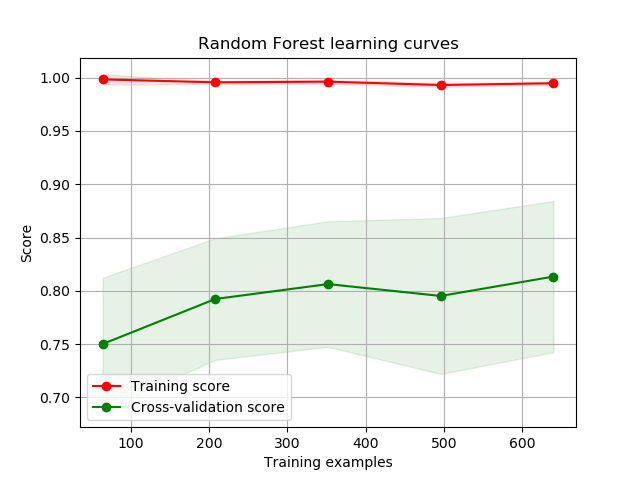

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<IPython.core.display.Javascript object>


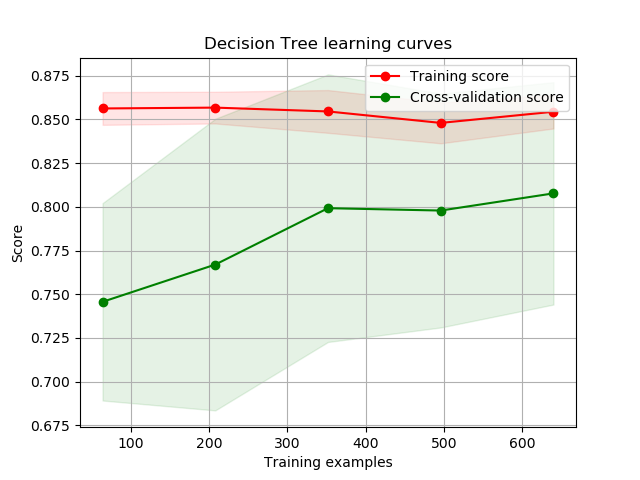

In [50]:
g = plot_learning_curve(rf_random.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(dtr_random.best_estimator_,"Decision Tree learning curves",X_train,y_train,cv=kfold)

In [54]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("Decision Tree", dtr_random.best_estimator_),("Random Forest",rf_random.best_estimator_)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1
        

<IPython.core.display.Javascript object>

IndexError: list index out of range

In [59]:
pred_rf = dtr_random.best_estimator_.predict(X_test)
test_data["Survived"]=pd.Series(pred_rf, index=test_data.index)
test_data[["PassengerId", "Survived"]].to_csv("DSKPrediction.csv", index=False)

ValueError: Length of passed values is 179, index implies 418